## Visualizing and analyzing line shapes in the simulated photosphere

Welcome back! Now we supposedly know everything about line formation and we can put it to work :-)

With that in mind I have prepared a simulated atmosphere (which is just a set of 3D arrays of various parameters) and a simulated spectra (which is also essentially a 3D array, we will see why. 

Let's start the adventure by loading the spectra and figuring out what it means.

In [1]:
# Our general imports at the begining

import numpy as np # basic mathematical and numerical functionallity 
import matplotlib.pyplot as plt # some plotting functionallity, for various things we will do

import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.size" : 18,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# This last line will give us a little bit nicer plot labeling

# And then some functionallity to read fits files
from astropy.io import fits 

In [2]:
stokes = fits.open("/home/milic/scratch/50G.ngrey.288x100x288_atmos_61_synth.fits")
stokes.info()

Filename: /home/milic/scratch/50G.ngrey.288x100x288_atmos_61_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (601, 4, 288, 288)   float64   


In [3]:
stokes = stokes[0].data

In [4]:
stokes.shape

(288, 288, 4, 601)

What do these dimensions mean? 

- 0 and 1 - spatial, we have 288 x 288 pixels 
- 2 is dimension 4 , that is for 4 Stokes parameters, we can discuss this later
- 3 is for wavelengths

In [5]:
# Let's extract what we need 
Intensity = np.copy(stokes[:,:,0,:])

Now, let's all agree that if I want to plot the image, I need to choose one wavelength and then plot distribution of intensity in x and y.

Text(0, 0.5, 'y[pixels]')

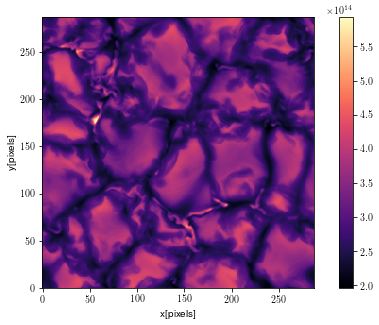

In [6]:
plt.figure(figsize=[9,5])
plt.imshow(Intensity[:,:,0].T,origin='Lower',cmap='magma')
plt.colorbar()
plt.xlabel("x[pixels]")
plt.ylabel("y[pixels]")


These are, believe it or not, granules, that is objects similar to something like this:

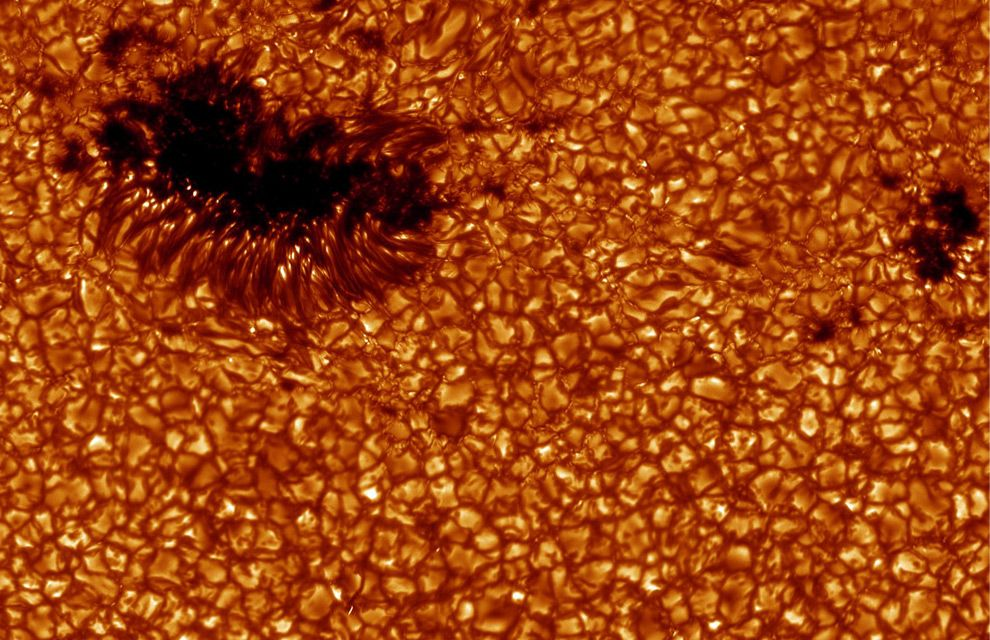

#### But you are telling us there is also some spectra there? What do you mean by that?

Well each of these pixels contains the intensity at 601 wavelength points, believe it or not. 

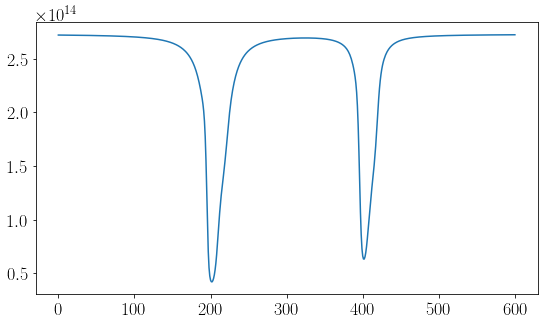

In [15]:
# To prove this, let's plot the spectrum in one of the points:
plt.figure(figsize=[9,5])
plt.plot(Intensity[0,0])


Wow! Looks like two absorption lines! Nice! 

### Let's summarize what this means: 

We have an image. And each point in the image has it's own spectrum. It is hard to visualize the 3D structure on a 2D screen so we can either:

- Plot spectrum by spectrum 
- Make images at one wavelength at the time

We plotted one spectrum, but let's just convince ourselves that they are not all the same

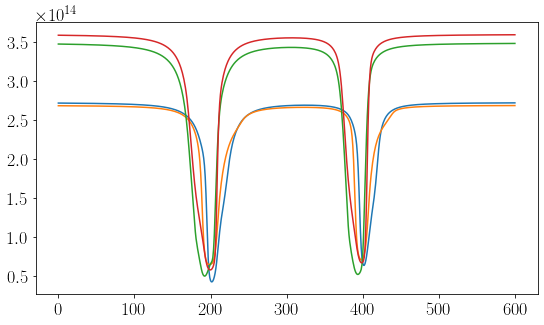

In [16]:
plt.figure(figsize=[9,5])
plt.plot(Intensity[0,0])
plt.plot(Intensity[50,50])
plt.plot(Intensity[100,100])
plt.plot(Intensity[20,21])

Nice ! Obviously some of the spectra are more similar, some are less similar, but we can see that they are, in general, not all the same. We don't know exactly what is x axis but I can tell you that. 

In [7]:
llambda = np.linspace(630.05,630.35,601) # nm (but we usually use angstroms)

Why don't we try to plot images at "interesting" wavelenghts, according to the spectra above?

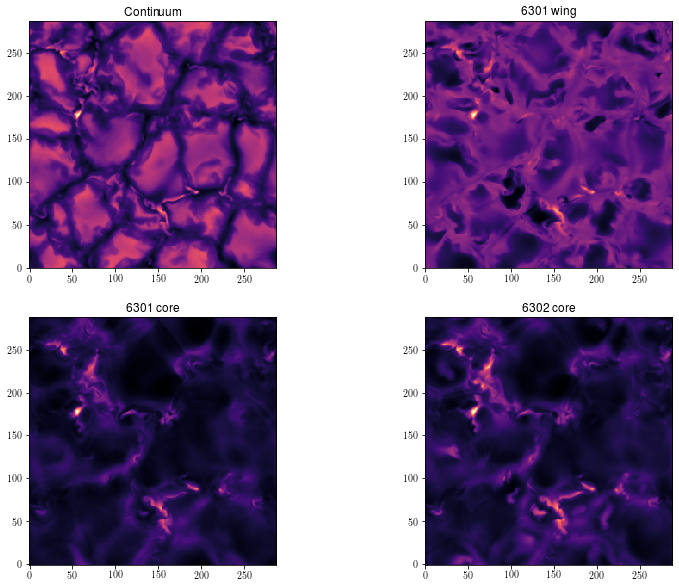

In [9]:
plt.figure(figsize=[13,10])
plt.subplot(221)
plt.imshow(Intensity[:,:,0].T,origin='Lower',cmap='magma')
plt.title("Continuum")
plt.subplot(222)
plt.title("6301 wing")
plt.imshow(Intensity[:,:,185].T,origin='Lower',cmap='magma')
plt.subplot(223)
plt.title("6301 core")
plt.imshow(Intensity[:,:,200].T,origin='Lower',cmap='magma')
plt.subplot(224)
plt.title("6302 core")
plt.imshow(Intensity[:,:,400].T,origin='Lower',cmap='magma')

## Very important question: How do you interpret this?

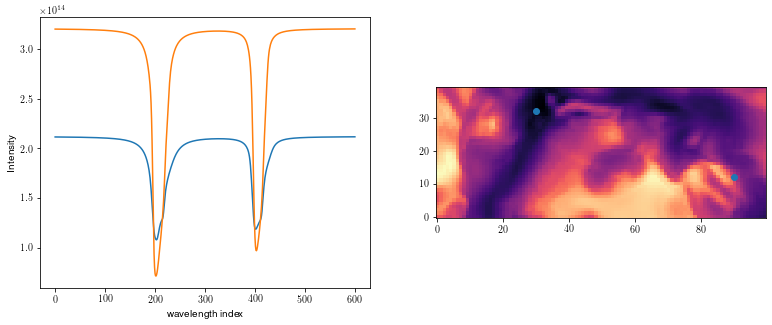

In [13]:

plt.figure(figsize=[13,5])
plt.subplot(121)
plt.plot(stokes[180,232,0])
plt.plot(stokes[240,212,0])
plt.xlabel("wavelength index")
plt.ylabel("Intensity")
plt.subplot(122)
plt.imshow(Intensity[150:250,200:240,0].T,origin='Lower',cmap='magma')
plt.plot([30,90],[32,12],'o')

plt.savefig("inverse_gran.png",bbox_inches='tight')